In [129]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

# rANDOMLY ADD NOISE TO mnist AND SEE WHAT HAPPENS!

In [130]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('uint8')   
x_test = x_test.astype('uint8')
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train.shape

(60000, 28, 28)

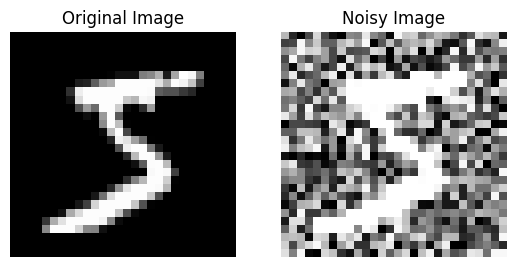

In [131]:
# gauss_noise=np.zeros((28,28),dtype=np.uint8)
# cv2.randn(gauss_noise,128,20)
# gauss_noise=(gauss_noise*0.5).astype(np.uint8)

# plt.imshow(x_train[0],cmap='gray')
# plt.axis("off")
# plt.title("Original")

# gn_img=cv2.add(x_train,gauss_noise)

# plt.imshow(gauss_noise,cmap='gray')
# plt.axis("off")
# plt.title("Gaussian Noise")

# plt.imshow(gn_img,cmap='gray')
# plt.axis("off")
# plt.title("Combined")
dataset = x_train # Replace with your actual dataset loading code

# Convert the dataset to a NumPy array


# Add Gaussian noise to the entire dataset
mean = 0
stddev = 25
lighten_factor = 8 # Adjust this factor to control the intensity of lightening
gaussian_noise = np.random.normal(mean, stddev, dataset.shape).astype('uint8')  # Convert to uint8
lightened_noise = (lighten_factor * gaussian_noise).astype('uint8')  # Convert to uint8
noisy_dataset = cv2.add(dataset, lightened_noise)

# Display one example (original and noisy) for illustration
index = 0  # Change this index based on your dataset
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(dataset[index], cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(noisy_dataset[index], cmap='gray')
plt.axis('off')

plt.show()

mean_2 = 0
stddev_2 = 25
lighten_factor_2 = 8  # Adjust this factor to control the intensity of lightening
gaussian_noise_2 = np.random.normal(mean_2, stddev_2, x_test.shape).astype('uint8')  # Convert to uint8
lightened_noise_2 = (lighten_factor_2 * gaussian_noise_2).astype('uint8')  # Convert to uint8

x_train = cv2.add(x_train, lightened_noise)
x_test = cv2.add(x_test, lightened_noise_2)




In [132]:
# Preprocessing:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_train = x_train.astype('float32')   
x_test = x_test.astype('float32')

# train_scaler = StandardScaler()

# x_train_scaled = train_scaler.fit(x_train).transform(x_train)      
# x_test_scaled = StandardScaler().fit_transform(x_test)

In [133]:
# Regular KNN
kVals = [1,5,10,20, 30]
accuracies = []
for k in kVals:
    # train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)

    model.fit(x_train, y_train)

    # evaluate the model and print the accuracies list
    score = model.score(x_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)


k=1, accuracy=85.60%


KeyboardInterrupt: 

In [142]:
# Applying PCA
pca = PCA(n_components=32)

pca.fit(x_train)
pca_train = pca.transform(x_train)
pca_test = pca.transform(x_test)

eigen_numbers = pca.components_

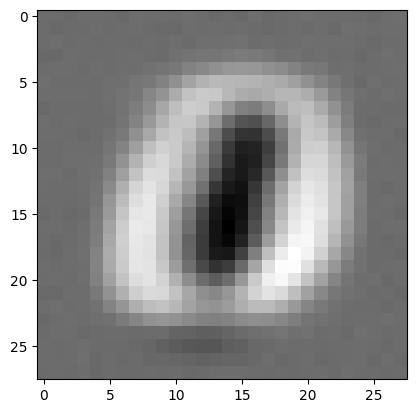

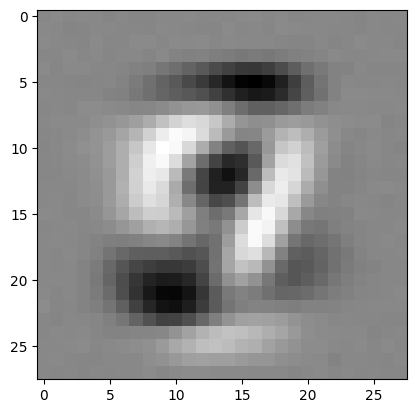

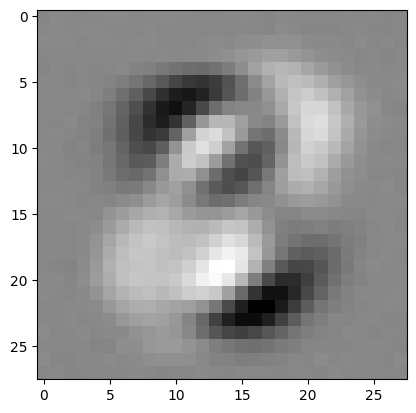

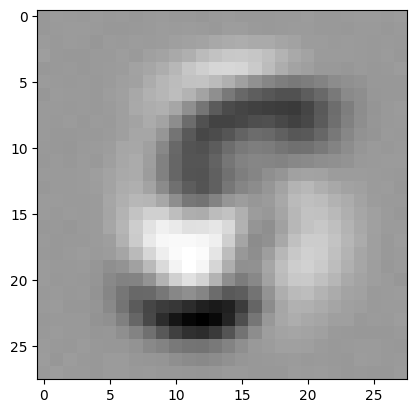

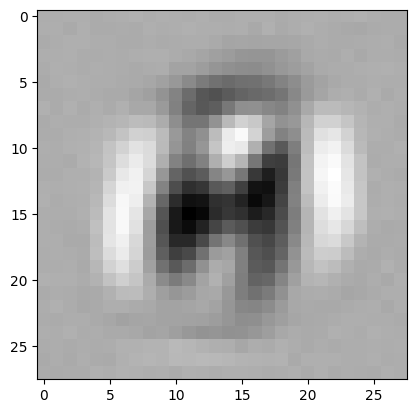

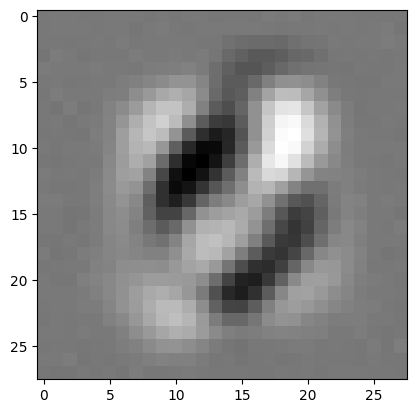

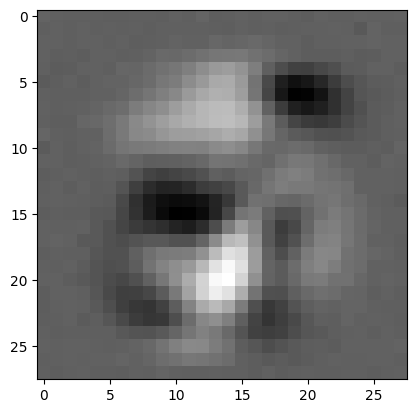

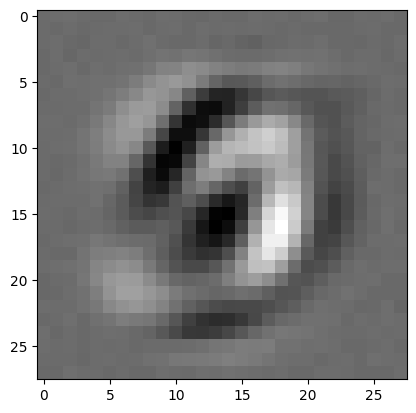

In [151]:
# PCA (// reconstruction) visualization
i = 8
for k in range(i):
    plt.imshow(eigen_numbers[k].reshape((28, 28)), cmap='gray')
    plt.show()

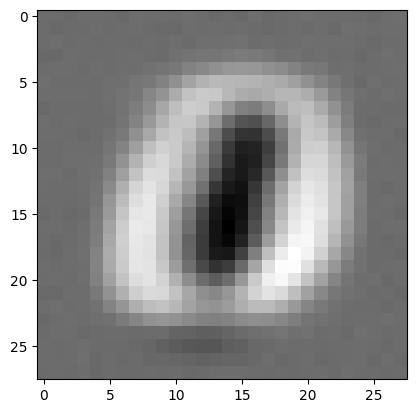

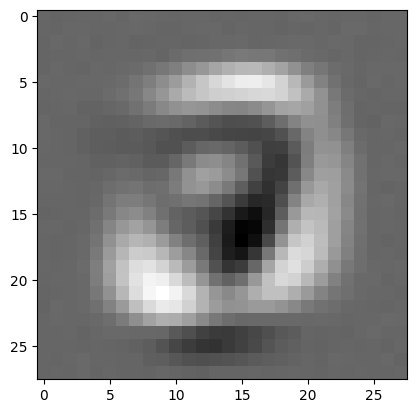

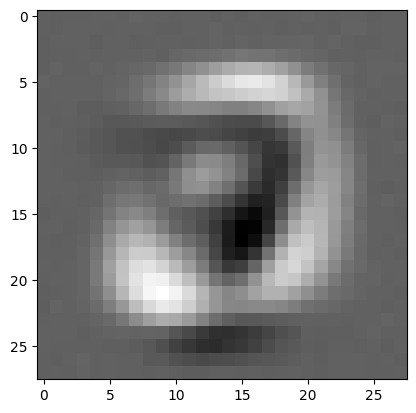

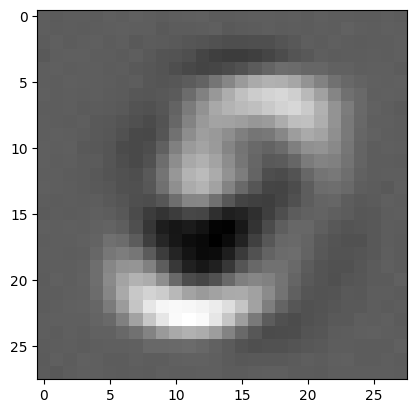

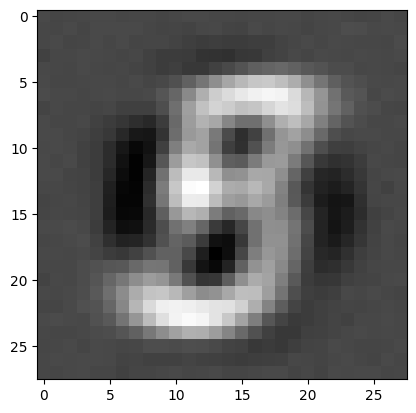

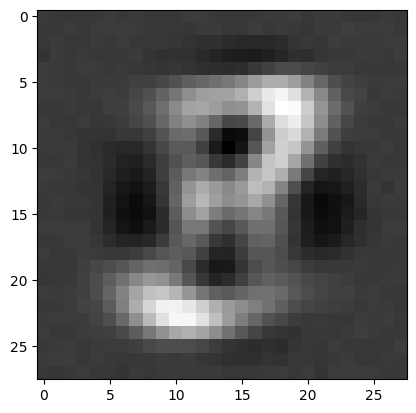

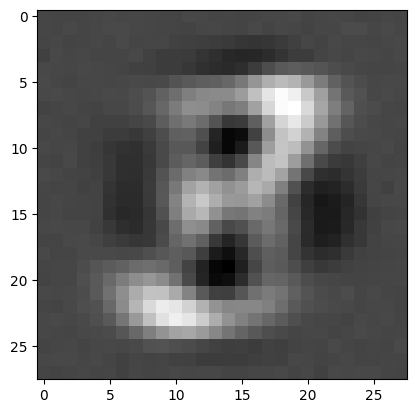

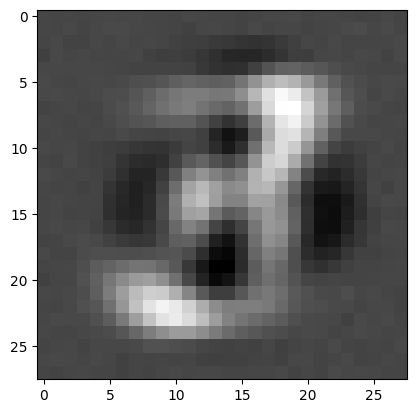

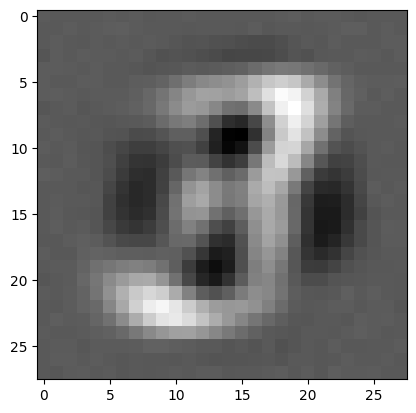

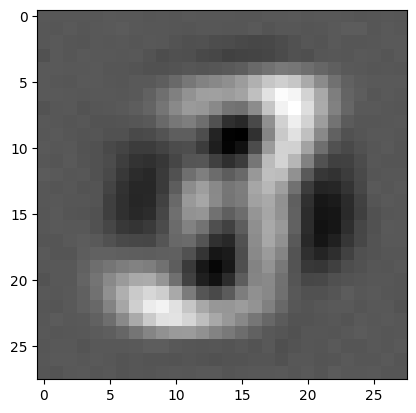

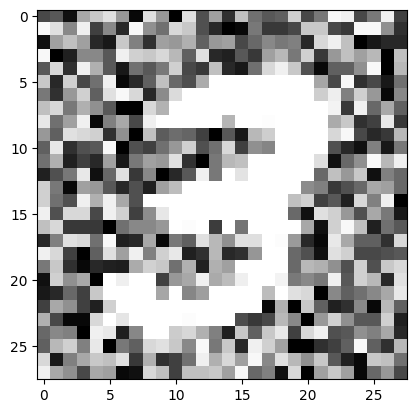

In [155]:
i = 7
j = 10
# plt.imshow(eigen_numbers[i].reshape((28, 28)), cmap='gray_r')
for l in range(j):
    image = np.zeros((784,))
    for k in range (l+1):
        image += pca_train[i][k] * eigen_numbers[k]
    # What if i grab the specific THINGS THAT have the higest scalars, with respect to the linear combo per IMAGE
    # a 0 might use the first eigen vector a lot, but a 1 may mainly use 7?
    plt.imshow(image.reshape((28, 28)), cmap='gray')
    # print(y_train[i])
    #Actually displaying the plot if you are not in interactive mode
    plt.show()

# true_image = np.zeros((784,))
# for k in range (128):
#     true_image += pca_train[i][k] * eigen_numbers[k]

plt.imshow(x_train[i].reshape((28, 28)), cmap='gray')
plt.show()

In [146]:
#PCA KNN
for k in kVals:
    # train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)

    model.fit(pca_train, y_train)

    # evaluate the model and print the accuracies list
    score = model.score(pca_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=94.52%
k=5, accuracy=95.36%
k=10, accuracy=95.51%
k=20, accuracy=95.22%
k=30, accuracy=95.01%
